### General notes
The dataset that we are going to use can be found in this repository itself. Nonetheless, for more information about the data please visit: 
[The data's website](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset). 

As a side note, please be aware that this model doesn't aim to create a perfect model, but is rather a toy model with which to practice learning algorithms like logistic regression. Please use with care. 

Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, classification_report, accuracy_score,precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)


Load the data, explore and clean.

In [2]:
df=pd.read_csv("data/heart-blood_data.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
#To make our model simpler, we will consider dropping some of the parameters. Of course, for the best results we should keep everythink but for this simple toy model it will be enough.
df.drop(columns=["oldpeak","thal","slope","ca"],inplace=True) 
df.rename(columns={"cp":"chest pain","trestbps":"resting blood pressure","chol":"cholesterol","fbs":"fasting blood sugar","restecg":"resting ecg","thalach":"max heart rate","exang":"exercise angina","target":"disease_risk"},inplace=True)
df.head()

,age,sex,chest pain,resting blood pressure,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,disease_risk
0,52,1,0,125,212,0,1,168,0,0
1,53,1,0,140,203,1,0,155,1,0
2,70,1,0,145,174,0,1,125,1,0
3,61,1,0,148,203,0,1,161,0,0
4,62,0,0,138,294,1,1,106,0,0


In [5]:
#Input variables and targets
scaler=StandardScaler()
X=df.drop(columns=["disease_risk"])
X_scaled=scaler.fit_transform(X)
y=df["disease_risk"]
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Train the model. We will use logistic regression for this case. 

In [6]:
model=LogisticRegression(max_iter=1000) #we set the max_iter, because otherwise we might get a ConvergenceWarning.
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [7]:
y_pred_proba=model.predict_proba(X_test) #we will get two columns. The first is the probability of not having the risk of a heart disease, the second of having it. 
threshold=0.5 #since heart diseases are relatively rare we want to get a higher recall value. This comes at the expense of precision, though. 
y_pred = (y_pred_proba[:,1]>threshold).astype(int)
# Calculate log loss (binary cross-entropy)
logloss = log_loss(y_test, y_pred_proba)

Showing the results and performance of the model.

In [8]:
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Log Loss:", logloss)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_mat)
print("Classification Report:\n", classification_rep)

Log Loss: 0.4470242858326839
Accuracy: 0.7951219512195122
Confusion Matrix:
 [[74 28]
 [14 89]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.73      0.78       102
           1       0.76      0.86      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



Here we can see the behaviour of precision and recall as a function of the thresholds. This way we can choose the best possible value for it. 

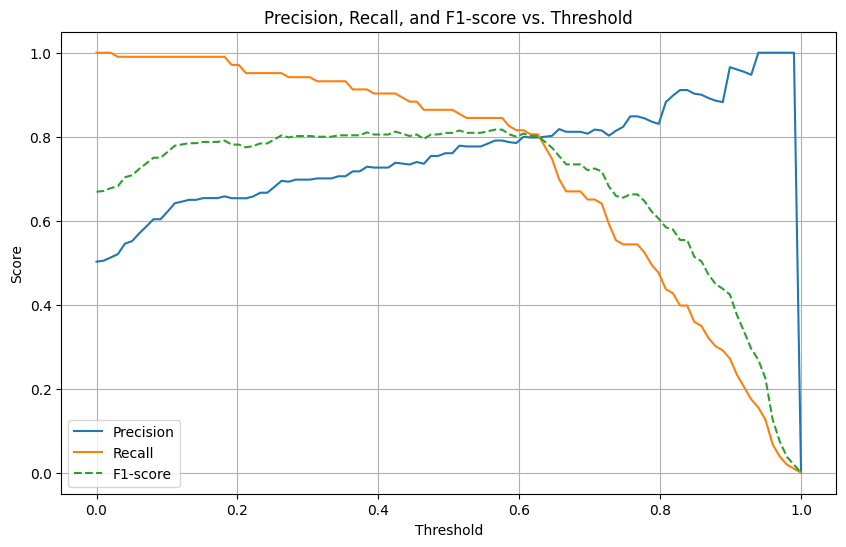

In [9]:
thresholds = np.linspace(0, 1, 100)  # Generate 100 thresholds from 0 to 1

# Lists to store precision, recall, and F1-score
precisions = []
recalls = []    
f1_scores = []

# Calculate precision, recall, and F1-score for each threshold
for threshold in thresholds:
    y_pred = (y_pred_proba[:,1] > threshold).astype(int)
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

# Plot precision, recall, and F1-score curves
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, f1_scores, label='F1-score', linestyle='--')
plt.title('Precision, Recall, and F1-score vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
ind=f1_scores.index(max(f1_scores))
optimal_threshold=thresholds[ind]
print("The optimal threshold is:",optimal_threshold)

The optimal threshold is: 0.5656565656565657


For this value for the threshold we get the following performance: 

In [11]:
threshold=0.5 #since heart diseases are relatively rare we want to get a higher recall value. This comes at the expense of precision, though. 
y_pred = (y_pred_proba[:,1]>threshold).astype(int)
# Calculate log loss (binary cross-entropy)
logloss = log_loss(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Log Loss:", logloss)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_mat)
print("Classification Report:\n", classification_rep)

Log Loss: 0.4470242858326839
Accuracy: 0.7951219512195122
Confusion Matrix:
 [[74 28]
 [14 89]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.73      0.78       102
           1       0.76      0.86      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



An interesting study we can make is see which parameters influence our model's performance the most, by analizing their coefficient in the logistic regression.

In [12]:
# Get the coefficients and feature names
coefficients = model.coef_[0]
feature_names = X.columns

# Create a DataFrame to hold the coefficients
coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort the coefficients by absolute value to see the most influential features
coefficients_df['Abs_Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

# Display the top 10 most influential features
print(coefficients_df.head(10))


                  Feature  Coefficient  Abs_Coefficient
7          max heart rate     0.897281         0.897281
1                     sex    -0.891973         0.891973
2              chest pain     0.751247         0.751247
8         exercise angina    -0.493206         0.493206
3  resting blood pressure    -0.377940         0.377940
4             cholesterol    -0.370244         0.370244
0                     age    -0.193390         0.193390
6             resting ecg     0.124894         0.124894
5     fasting blood sugar    -0.040053         0.040053


In this case, the top 5 most influential features are: 

In [13]:
TOP=5
top_features = coefficients_df['Feature'].head(TOP).values
print("Top features:", top_features)

Top features: ['max heart rate' 'sex' 'chest pain' 'exercise angina'
 'resting blood pressure']


As a matter of fact, we can analyze how the model behaves as a function of the number of features chosen. 

                  Feature  Coefficient  Abs_Coefficient
7          max heart rate     0.897281         0.897281
1                     sex    -0.891973         0.891973
2              chest pain     0.751247         0.751247
8         exercise angina    -0.493206         0.493206
3  resting blood pressure    -0.377940         0.377940
4             cholesterol    -0.370244         0.370244
0                     age    -0.193390         0.193390
6             resting ecg     0.124894         0.124894
5     fasting blood sugar    -0.040053         0.040053


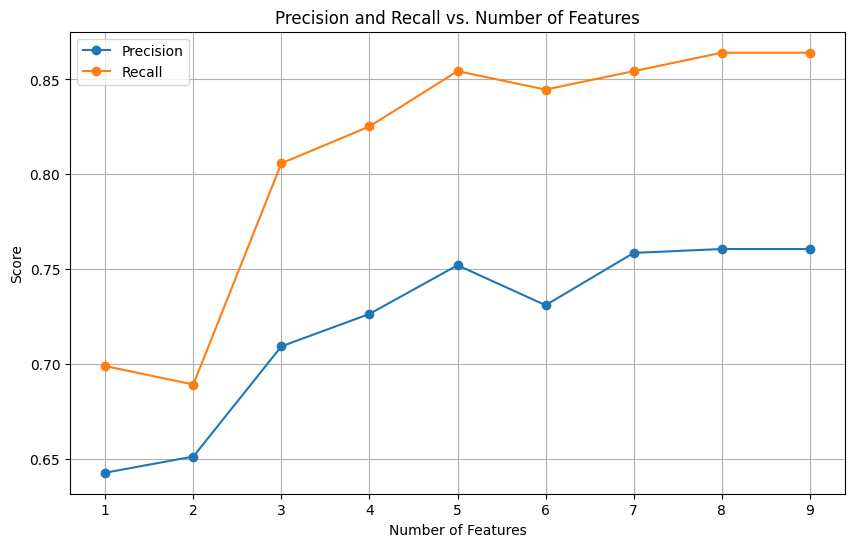

In [14]:
coefficients = model.coef_[0]
feature_names = X.columns

# Create a DataFrame to hold the coefficients
coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort the coefficients by absolute value to see the most influential features
coefficients_df['Abs_Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)
print(coefficients_df)

# Iterate over the number of top features and store precision and recall
precisions = []
recalls = []
num_features_list = range(1, len(feature_names) + 1)

for num_features in num_features_list:
    top_features = coefficients_df['Feature'].head(num_features).values
    
    # Subset the data to include only the top N features
    X_top = df[top_features]
    X_top_scaled = scaler.fit_transform(X_top)
    
    # Train-test split with the top N features
    X_train_top, X_test_top, y_train, y_test = train_test_split(X_top_scaled, y, test_size=0.2, random_state=42)
    
    # Train the new logistic regression model with top N features
    model_top = LogisticRegression(max_iter=1000)
    model_top.fit(X_train_top, y_train)
    
    # Predict and evaluate the model
    y_pred_proba_top = model_top.predict_proba(X_test_top)
    threshold = 0.5
    y_pred_top = (y_pred_proba_top[:, 1] > threshold).astype(int)
    
    # Calculate precision and recall
    precision_top = precision_score(y_test, y_pred_top)
    recall_top = recall_score(y_test, y_pred_top)
    
    precisions.append(precision_top)
    recalls.append(recall_top)

# Plot precision and recall as a function of the number of features
plt.figure(figsize=(10, 6))
plt.plot(num_features_list, precisions, label='Precision', marker='o')
plt.plot(num_features_list, recalls, label='Recall', marker='o')
plt.title('Precision and Recall vs. Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

Finally, one last thing that is interesting about this dataset is that it's performance is relatively good. Nonetheless, the amount of data available is not really large. Making a plot of the performance of the model as a function of the data used for the training we get the following: 

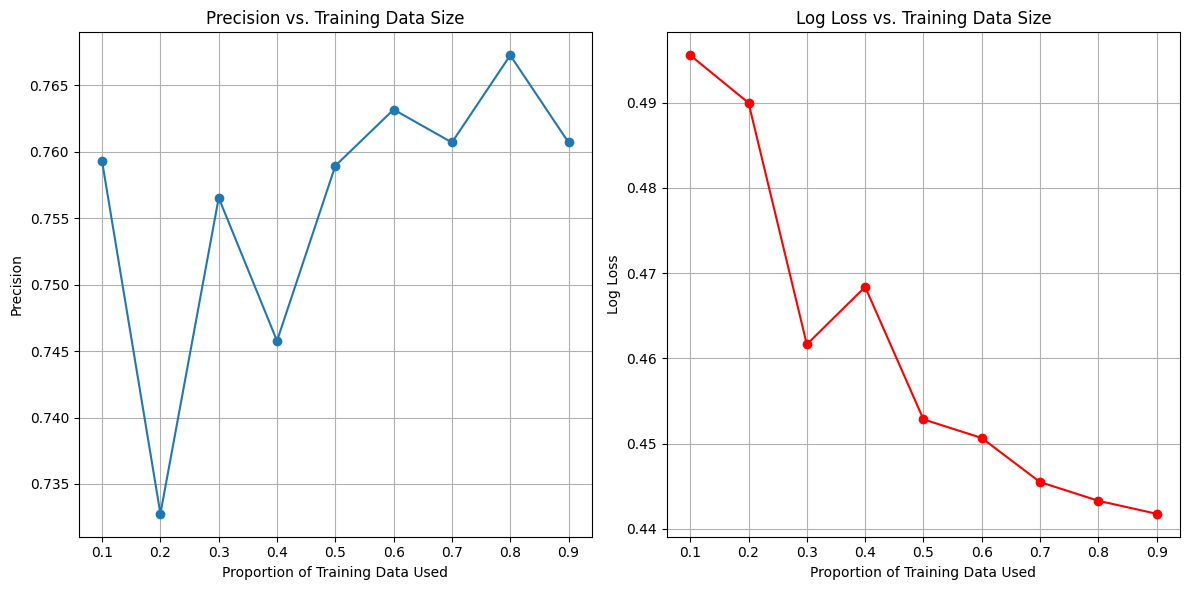

In [15]:
# Split into training and test data
X_train_full, X_test, y_train_full, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize lists to hold results
training_sizes = np.linspace(0.1, 0.9, 9)  # Changed to range from 0.1 to 0.9
precisions = []
log_losses = []

# Loop over different training sizes
for train_size in training_sizes:
    X_train, _, y_train, _ = train_test_split(X_train_full, y_train_full, train_size=train_size, random_state=42)
    
    # Train the logistic regression model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    
    # Predict and calculate precision
    y_pred_proba = model.predict_proba(X_test)
    threshold = 0.5
    y_pred = (y_pred_proba[:, 1] > threshold).astype(int)
    
    precision = precision_score(y_test, y_pred)
    precisions.append(precision)
    
    # Calculate log loss (binary cross-entropy)
    logloss = log_loss(y_test, y_pred_proba)
    log_losses.append(logloss)

# Plot precision as a function of training data size
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(training_sizes, precisions, marker='o')
plt.title('Precision vs. Training Data Size')
plt.xlabel('Proportion of Training Data Used')
plt.ylabel('Precision')
plt.grid(True)

# Plot log loss as a function of training data size
plt.subplot(1, 2, 2)
plt.plot(training_sizes, log_losses, marker='o', color='r')
plt.title('Log Loss vs. Training Data Size')
plt.xlabel('Proportion of Training Data Used')
plt.ylabel('Log Loss')
plt.grid(True)

plt.tight_layout()
plt.show()

As we can see, the error decreases as a function of the data used, so one might think that if we had more data, the performance could be improved, since we still can't see a clear threshold in the log loss, and maybe if we had more data we'd see an improvement in performance. In the large dataset notebook, we analyze the performance of the model that has a much larger dataset (but with different parameters). Please visit it for more information, as it's interesting to see the behaviour of the model that has a much larger amount of data.  